# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D,AveragePooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


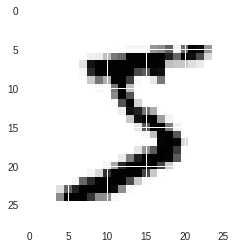

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

(10000, 28, 28)


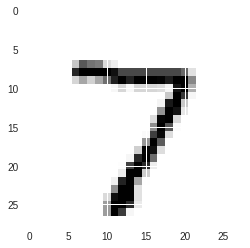

In [0]:
print (X_test.shape)
plt.imshow(X_test[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

# 28
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))

# 26, 64
model.add(SeparableConv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
# 24, 64
model.add(MaxPooling2D(pool_size=(2,2)))
# 12, 64
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))

# 10, 32
model.add(MaxPooling2D(pool_size=(2,2)))
# 5, 32
model.add(SeparableConv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
# 3, 32
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
#1, 16
model.add(Convolution2D(10, 1, 1))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
separable_conv2d_34 (Separab (None, 24, 24, 64)        4736      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
separable_conv2d_35 (Separab (None, 10, 10, 32)        2656      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
separable_conv2d_36 (Separab (None, 3, 3, 32)          1344      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train,Y_train,batch_size=32,nb_epoch=10,verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.1869 - acc: 0.9533 - val_loss: 0.0774 - val_acc: 0.9754
Epoch 2/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.0614 - acc: 0.9814 - val_loss: 0.0413 - val_acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.0459 - acc: 0.9861 - val_loss: 0.0473 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0409 - acc: 0.9870 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 5/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.0358 - acc: 0.9883 - val_loss: 0.0359 - val_acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0322 - acc: 0.9897 - val_loss: 0.0369 - val_acc: 0.9884
Epoch 7/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.0290 - acc: 0.9905 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
model.fit(X_train,Y_train,batch_size=64,nb_epoch=15,initial_epoch = 10,verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 11/15
  448/60000 [..............................] - ETA: 27s - loss: 0.0201 - acc: 0.9888

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 21s 354us/step - loss: 0.0120 - acc: 0.9960 - val_loss: 0.0227 - val_acc: 0.9931
Epoch 12/15
60000/60000 [==============================] - 21s 353us/step - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0246 - val_acc: 0.9921
Epoch 13/15
60000/60000 [==============================] - 21s 353us/step - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0389 - val_acc: 0.9891
Epoch 14/15
60000/60000 [==============================] - 21s 353us/step - loss: 0.0119 - acc: 0.9962 - val_loss: 0.0326 - val_acc: 0.9899
Epoch 15/15
60000/60000 [==============================] - 21s 353us/step - loss: 0.0099 - acc: 0.9966 - val_loss: 0.0340 - val_acc: 0.9912


In [0]:
model.fit(X_train,Y_train,batch_size=128,nb_epoch=17,initial_epoch = 15,verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 16/17
  128/60000 [..............................] - ETA: 59s - loss: 0.0051 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 17s 281us/step - loss: 0.0046 - acc: 0.9987 - val_loss: 0.0253 - val_acc: 0.9927
Epoch 17/17
60000/60000 [==============================] - 17s 279us/step - loss: 0.0031 - acc: 0.9992 - val_loss: 0.0267 - val_acc: 0.9926


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.026730599103895657, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.17685577e-05 1.23090194e-05 3.20189906e-06 1.46327557e-06
  1.15614230e-05 4.35191112e-07 1.80028437e-07 9.99958396e-01
  3.21574145e-09 5.53618293e-07]
 [1.17140216e-05 7.45370698e-06 9.99902606e-01 7.84561482e-09
  3.00805241e-05 3.66960933e-07 4.74714761e-05 2.42047008e-07
  1.24282773e-09 1.48972505e-08]
 [7.80264827e-07 9.99981523e-01 1.03213847e-06 4.41015544e-08
  1.07439046e-05 1.86881505e-06 4.27784784e-07 1.54714360e-06
  1.97207078e-06 1.52767132e-08]
 [9.99992490e-01 1.29438585e-10 8.73500561e-09 3.79300367e-12
  1.49056878e-09 3.40203449e-10 7.51575180e-06 1.05336149e-08
  4.49134729e-09 6.47657661e-09]
 [7.27209681e-10 3.13563149e-08 1.92794780e-09 6.56767141e-11
  9.99997139e-01 2.95264785e-10 1.72229218e-08 2.19673204e-08
  1.79523962e-09 2.91381593e-06]
 [1.26257510e-06 9.99990702e-01 2.15937291e-07 2.53531474e-10
  7.24790834e-06 7.46417257e-08 9.01873918e-08 2.79438524e-07
  4.01165536e-08 7.52931495e-09]
 [4.97263797e-13 7.66778285e-09 4.32845271e-09 2.75748785e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

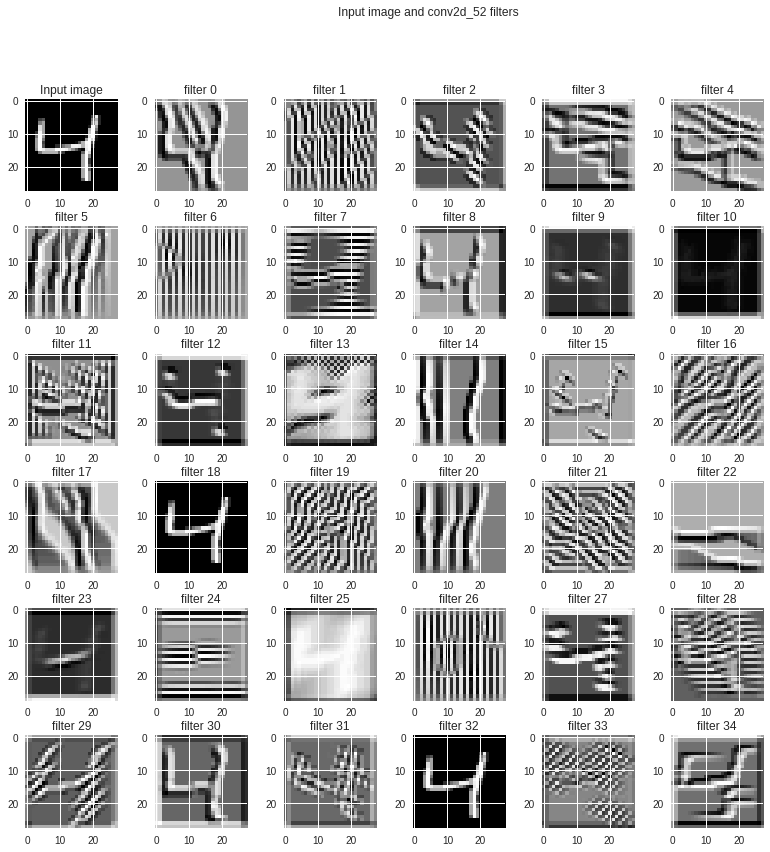

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_52'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()